In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Data generation

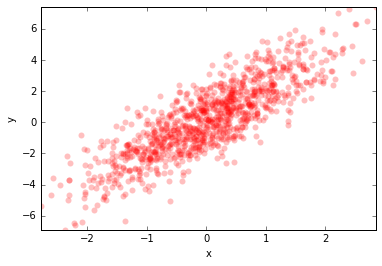

In [2]:
data_x = []; data_y = []
for _ in range(1000):
    x = np.random.normal(0.0, 1.0)
    y = 2 * x + 0.2 + np.random.normal(0.0, 1.25)
    data_x.append(x)
    data_y.append(y)
plt.axis((min(data_x), max(data_x), min(data_y), max(data_y)))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data_x, data_y, 'ro', markeredgewidth=0.0, alpha=0.25)
plt.show()

# NN design

In [3]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
hypothesis = W * x + b
loss = tf.reduce_mean(tf.square(hypothesis - y))

# Trainining and visualization

iter	w	b	loss
1	0.592	0.114	3.492
2	1.279	0.161	2.065
3	1.627	0.179	1.699
4	1.803	0.185	1.606
5	1.893	0.186	1.581
6	1.938	0.187	1.575
7	1.961	0.186	1.574
8	1.973	0.186	1.573
9	1.978	0.186	1.573
10	1.981	0.186	1.573


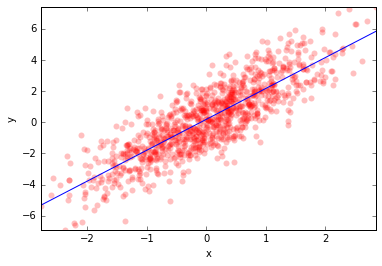

In [4]:
optimizer = tf.train.GradientDescentOptimizer(0.25)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Fit the NN
    sess.run(init)
    print('iter\tw\tb\tloss')
    for i in xrange(10):
        sess.run(train, feed_dict={x:data_x, y:data_y})
        print '%d\t%.3f\t%.3f\t%.3f'%(i+1, sess.run(W)[0], sess.run(b)[0],
                                      sess.run(loss, feed_dict={x:data_x, y:data_y}))
    
    # Print the results
    line_x = np.array([np.min(data_x), np.max(data_x)])
    line_y = float(sess.run(W)[0]) * line_x + float(sess.run(b))
    plt.axis((min(data_x), max(data_x), min(data_y), max(data_y)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(data_x, data_y, 'ro', markeredgewidth=0.0, alpha=0.25)
    plt.plot(line_x, line_y, 'b')
    plt.show()